In [29]:
import pandas as pd
import numpy as np
import scipy.stats as scs
import seaborn as sns

In [19]:
# Load Data
df = sns.load_dataset('planets')

In [61]:
# Calculating the mass of each group of planets
df.dropna().groupby('number').mass.mean()

number
1    3.239294
2    1.978001
3    0.916872
4    0.986492
5    1.166750
6    0.038556
Name: mass, dtype: float64

### Difference between Groups 1 vs 6.

In [62]:
# Groups 1 vs 6
group1 = df.query('number == 1')['mass'].dropna()
group6 = df.query('number == 6')['mass'].dropna()

In [63]:
# Check if equal variance
# Before conducting the two-sample T-Test we need to find if the given data groups have the same variance.
# If the ratio of the larger data groups to the small data group is less than 4:1 then we can consider that the given data groups have equal variance.

# The variances are higher than 4:1
print(np.var(group1))
print(np.var(group6))

16.75160592262317
0.002121005802469136


In [64]:
# Comparing distributions
scs.ttest_ind(group1, group6, equal_var=False)

TtestResult(statistic=14.050000704229284, pvalue=5.630068695479265e-35, df=307.3676437218068)

### Groups 1 and 6 are really different, but what about 3 and 4?

In [67]:
# Groups 1 vs 6
group3 = df.query('number == 2')['mass'].dropna()
group4 = df.query('number == 5')['mass'].dropna()

# The variances are lower than 4:1
print(np.var(group3))
print(np.var(group4))

13.874315545451015
1.9281216874999998


In [69]:
# Comparing distributions
scs.ttest_ind(group3, group4, equal_var=False)

TtestResult(statistic=1.2188823753797207, pvalue=0.2869673487454712, df=4.19449511170575)

In [85]:
to_plot = df.dropna().groupby('number').mass.mean().reset_index()

<Axes: xlabel='number', ylabel='mass'>

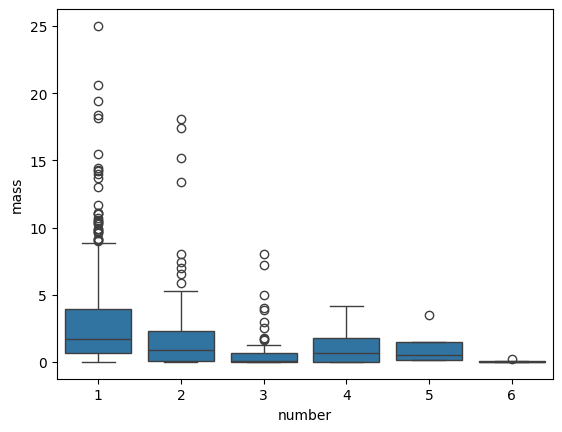

In [89]:
sns.boxplot(x='number', y='mass', data=df.dropna())